<a href="https://colab.research.google.com/github/Vicente-VP/Telecom-X-Analise-de-Evasao-de-Clientes/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [2]:
import pandas as pd
df = pd.read_json('TelecomX_Data.json')
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.isnull().sum()
customer_df = df['phone'].apply(pd.Series)
print(customer_df.isnull().sum())

PhoneService     0
MultipleLines    0
dtype: int64


In [5]:
df['combined'] = df.apply(lambda row: (
    row['Churn'],
    tuple(sorted(row['customer'].items())),
    tuple(sorted(row['phone'].items())),
    tuple(sorted(row['internet'].items())),
    tuple(sorted(row['account'].items()))
), axis=1)

duplicatas = df[df.duplicated('combined', keep=False)]
print(duplicatas)

      customerID Churn                                           customer  \
218   0328-GRPMV   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
295   0426-TIRNE   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
473   0673-IGUQO    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
624   0887-HJGAR   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
685   0970-QXPXW    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
701   1000-AJSLD   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
745   1066-JKSGK   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
881   1240-KNSEZ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
1341  1934-SJVJK   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
1357  1963-SVUCV   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
1841  2619-WFQWU   Yes  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1851  2636-ALXXZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

#üîß Transforma√ß√£o

In [6]:
df['combined'] = df.apply(lambda row: (
    row['Churn'],
    tuple(sorted(row['customer'].items())),
    tuple(sorted(row['phone'].items())),
    tuple(sorted(row['internet'].items())),
    tuple(sorted(row['account'].items()))
), axis=1)

df_clean = df.drop_duplicates(subset='combined').drop(columns='combined')

df_clean.reset_index(drop=True, inplace=True)

In [7]:
df_clean['account'][0]['Charges']['Monthly']

65.6

In [8]:
df_clean['Contas_Diarias'] = df_clean['account'].apply(lambda d: d['Charges']['Monthly'] / 30)
df_clean.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  Contas_Diarias  
0  {'Contract': 'One year', 'PaperlessBilling': '...        2.186667  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...        1.996667  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...        2.463333  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...        3.266667  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...        2.796667

In [9]:
df_clean.dropna(subset=['Churn'], axis=0, inplace=True)

In [10]:
dic = {'chave': 2}
type(dic)

dict

In [11]:
# for col in df_clean.columns:
#     for i in df_clean[col]:
#       if type(i) == dict:
#         for key, value in i.items():
#           if value == 'Yes':
#             print(df_clean[col])

for col in df_clean.columns:
    for idx, item in enumerate(df_clean[col]):
        if isinstance(item, dict):
            # Criar novo dicion√°rio com valores substitu√≠dos
            updated_dict = {k: 1 if v == 'Yes' else 0 if v == 'No' else v for k, v in item.items()}
            df_clean.at[idx, col] = updated_dict

In [12]:
df_clean.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                     phone  \
0  {'PhoneService': 1, 'MultipleLines': 0}   
1  {'PhoneService': 1, 'MultipleLines': 1}   
2  {'PhoneService': 1, 'MultipleLines': 0}   
3  {'PhoneService': 1, 'MultipleLines': 0}   
4  {'PhoneService': 1, 'MultipleLines': 0}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': 0...   
1  {'InternetService': 'DSL', 'OnlineSecurity': 0...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  Contas_Diarias  
0  {'Contract': 'One year', 'PaperlessBilling': 1...        2.186667  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...        1.996667  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...        2.463333  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...        3.266667  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...        2.796667

#üìä Carga e an√°lise

In [13]:
df_clean.describe()

Contas_Diarias
count     7245.000000
mean         2.160246
std          1.003648
min          0.608333
25%          1.185000
50%          2.345000
75%          2.996667
max          3.958333

In [14]:
for i in df_clean.index:
  if df_clean.loc[i, 'Churn'] == '':
    df_clean.drop(i, inplace=True)


In [15]:
evasao = df_clean['Churn'].value_counts()

dict_evasao ={
    'Abandonou': evasao.index,
    'Num': evasao.values
}


df_evasao = pd.DataFrame(dict_evasao)

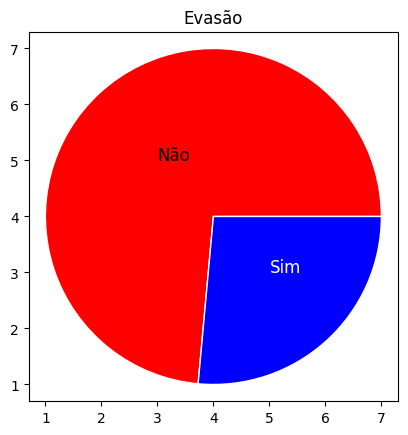

In [16]:
import matplotlib.pyplot as plt
color = ['Red', 'Blue']

fig, ax = plt.subplots()
plt.text(3,5, 'N√£o', fontsize = 12)
plt.text(5,3, 'Sim', fontsize = 12, color='w')
ax.pie(df_evasao['Num'], colors=color, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
ax.set(title="Evas√£o")

plt.show()

In [17]:
df_clean['gender'] = df_clean['customer'].apply(
    lambda x: x['gender'] if isinstance(x, dict) and 'gender' in x else None
)

In [18]:
grouped = df_clean.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

<Axes: xlabel='gender'>

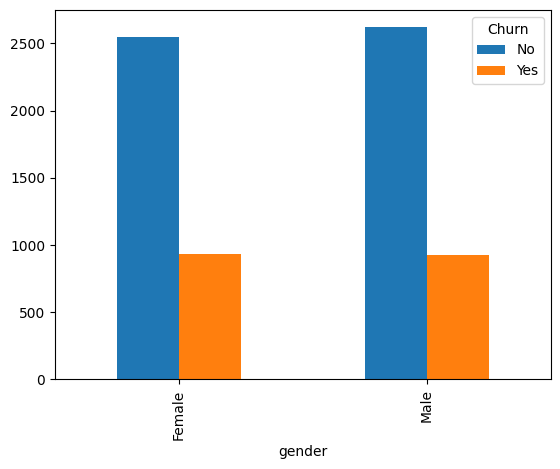

In [19]:
colors = ['#1f77b4', '#ff7f0e']  # azul e laranja

# Plotagem
grouped.plot(kind='bar', color=colors)

In [20]:
df_clean['Contrato'] = df_clean['account'].apply(
    lambda x: x['Contract'] if isinstance(x, dict) and 'Contract' in x else None
)

<Axes: xlabel='Contrato'>

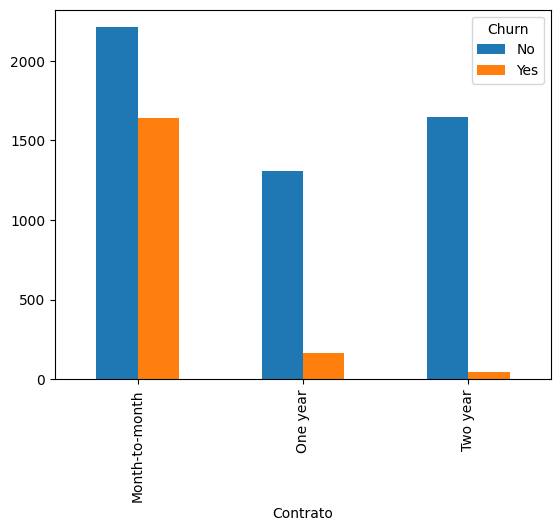

In [21]:
df_contract = df_clean.groupby(['Contrato', 'Churn']).size().unstack(fill_value=0)

df_contract.plot(kind='bar', color=colors)

In [27]:
df_clean['PaymentMethod'] = df_clean['account'].apply(
    lambda x: x['PaymentMethod'] if isinstance(x, dict) and 'PaymentMethod' in x else None
)

<Axes: xlabel='PaymentMethod'>

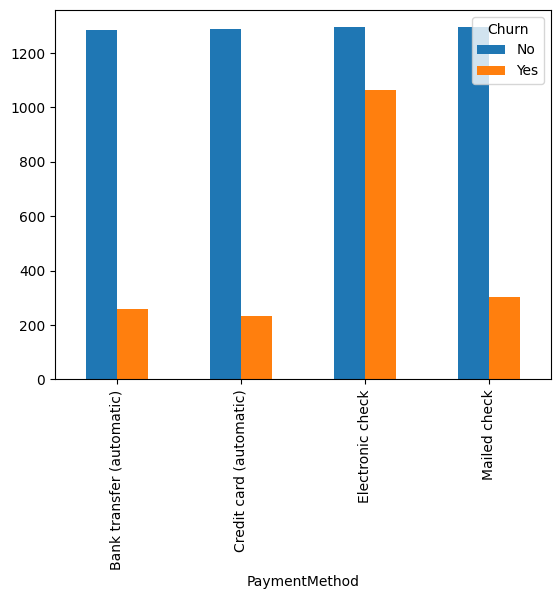

In [32]:
df_metPag = df_clean.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
df_metPag.plot(kind='bar', color=colors)

#üìÑRelatorio Final

## Introdu√ß√£o:
O principal objetivo da nossa analise √© **determinar** poss√≠veis motivos para os clientes do Telecom acabarem **saindo** do nosso servi√ßo. Uma das suposi√ß√µes √© aqueles clientes que contratam nossos servi√ßos por tempos reduzidos, ou seja, contratam a gente apenas por alguns meses e n√£o fecham um contrato mais longo. J√° a segunda vimos que os clientes que pagam o sevi√ßo usando check eletronico acabam saindo mais dos nossos servi√ßos.  

## Limpeza e Tratamento de Dados:
Comecei carregando o arquivo dentro do collab em vez de criar uma vari√°vel com a url do dataset, pois acho mais pr√°tico, ap√≥s isso atribui os dados a uma vari√°vel.
Comecei an√°lisando o dataset e percebi que todas as informa√ß√µes estavam com o tipo object, j√° que a grande marioria possuia um dicion√°rio dentro delas dificultando um pouco nossa an√°lise.
Verifiquei se havia algum dado repetido e aparentemente n√£o havia, mas ap√≥s tentar verificar cada dicion√°rio foi percebido que havia sim algumas linhas repetidas e a melhor decis√£o foi exclui-las. (Depois percebi que tinham linhas inconsistentes, j√° que na coluna os √∫nicos valores que poderiam existir √© "Yes" e "No", mas no final das contas existiam strings vazias que foram exclu√≠das posteriormente).
Em pen√∫ltimo criei uma coluna pra entendermos o gasto di√°rio do cliente usando os dados de gasto mensal do cliente.
Por √∫ltimo padronizei os valores que tinham valor de "Yes" e "No" para 1 ou 0 (Menos na coluna Churn)

## An√°lise Explorat√≥ria de Dados:
Foram realizadas 5 an√°lises, sendo elas:
 - Verifica√ß√£o de m√©dia, mediana e desvio padr√£o
 - Quantidade de Evas√£o atrav√©s de um gr√°fico de pizza
 - Rela√ß√£o entre o g√™nero e a quantidade de evas√£o utilizando gr√°fico de barras
 - Rela√ß√£o entre o tipo do contrato e a quantidade de evas√£o utilizando gr√°fico de barras
 - Rela√ß√£o entre o m√©todo de pagamento e a quantidade de evas√£o utilizando gr√°fico de barras  

## Conclus√µes e Insights:
Ap√≥s a an√°lise dos gr√°ficos realizados chegamos a conclus√£o que os clientes que utilizam m√©todo de pagamento que n√£o √© autom√°tico acaba cancelando mais o nosso servi√ßo, um outro ponto tamb√©m s√£o os clientes que contratam nosso servi√ßo por um per√≠odo curto de tempo.

## Recomenda√ß√µes:
Portanto algumas poss√≠veis ideias para resolvermos esse problema seria ou adicionarmos algum tipo de recompensa para pessoas que utilizam m√©todos de pagamentos autom√°ticos, impulsionando pessoas a migrarem. Outra ideia seria talvez retirar outros m√©todos de pagamentos, mas isso nos faria perder alguns clientes.
J√° na parte do tipo do contrato poderemos dar algum tipo de desconto pra pessoa contratar nosso servi√ßo anual ou por 2 anos.